In [20]:
import pandas as pd

file1_train = 'data/감성대화말뭉치(최종데이터)_Training.csv'
file1_test = 'data/감성대화말뭉치(최종데이터)_Validation.csv'

train1  = pd.read_csv(file1_train)
test1 = pd.read_csv(file1_test)

### 문장, 감정 대분류 칼럼만 남기고 순서바꾸기

In [21]:
# 대분류, 문장 칼럼만 추출
train1 = train1[['감정_대분류','사람문장1']]
test1 = test1[['감정_대분류','사람문장1']]

# # 감정을 정수 라벨로 변경
# emotions = {'기쁨': 0, '불안': 1, '당황': 2, '슬픔': 3, '분노': 4, '상처': 5}
# train1['emotion'] = train1.emotion.map(emotions)

#칼럼이름 변경하고 순서 바꾸기
train1.columns = ['emotion', 'sentence']
test1.columns = ['emotion', 'sentence']  
train1 = train1.reindex(columns=['sentence', 'emotion'])
test1 = test1.reindex(columns=['sentence', 'emotion'])

train1.sample(n=5)

,sentence,emotion
35437,오늘 식당에서 친구가 내 뒷담화하는 말을 우연히 들었어. 평상시에 내 앞에서는 잘하...,상처
22101,전과 달리 이젠 퇴근하면 나를 기다려주는 아내랑 두 아이가 있어서 행복해.,기쁨
39587,돈은 없지만 애들 뒷바라지는 책임지고 다 했지.,당황
19816,아내가 화장실에 다녀오면 처리를 안 해서 당황스러워.,분노
17832,사업에 대한 꿈을 못 버린 큰 아들이 자꾸만 금전적으로 사고를 쳐.,분노


### 데이터 수 & 결측치 확인

In [22]:
print(train1.info(),end ='\n\n')
print(test1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51630 entries, 0 to 51629
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sentence  51630 non-null  object
 1   emotion   51630 non-null  object
dtypes: object(2)
memory usage: 806.8+ KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6641 entries, 0 to 6640
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sentence  6641 non-null   object
 1   emotion   6641 non-null   object
dtypes: object(2)
memory usage: 103.9+ KB
None


In [23]:
print(train1.isnull().sum(), end = '\n\n')
print(test1.isnull().sum())

sentence    0
emotion     0
dtype: int64

sentence    0
emotion     0
dtype: int64


### 감성 대화 말뭉치 합쳐서 csv 파일로 다시 저장

In [ ]:
# file_names = ['data/감성대화말뭉치(최종데이터)_Training.csv','data/감성대화말뭉치(최종데이터)_Validation.csv']
# for file_name in file_names:
#     temp = pd.read_csv(file_name, sep='구분자', encoding='utf-8') #csv파일을 하나씩 열어 임시 데이터프레임으로 생성한다
#     total = pd.concat([total, temp]) #전체 데이터프레임에 추가하여 넣는다

# total.to_csv("data/감성대화망뭉치(병합).csv")

In [28]:
# 전처리된 데이터프레임 합치고 csv로 저장   
temp  = pd.concat([train1, test1])
temp    #행 숫자보면 합쳐진거 맞는데 왜 test1 행번호가 그대로일까..

,sentence,emotion
0,일은 왜 해도 해도 끝이 없을까? 화가 난다.,분노
1,이번 달에 또 급여가 깎였어! 물가는 오르는데 월급만 자꾸 깎이니까 너무 화가 나.,분노
2,회사에 신입이 들어왔는데 말투가 거슬려. 그런 애를 매일 봐야 한다고 생각하니까 스...,분노
3,직장에서 막내라는 이유로 나에게만 온갖 심부름을 시켜. 일도 많은 데 정말 분하고 ...,분노
4,얼마 전 입사한 신입사원이 나를 무시하는 것 같아서 너무 화가 나.,분노
...,...,...
6636,나랑 비슷한 시기에 결혼하는 친구는 시댁에서 집을 해줘서 너무 부러워. 우리는 대출...,당황
6637,친구 한 명이 결혼해서 아이를 가졌는데 너무 행복해 보이더라. 기분이 좋지만은 않아.,당황
6638,남들은 결혼 전에 일억을 모았다는데 난 뭐를 한 것인지 모르겠어. 자괴감만 드네.,당황
6639,나보다 결혼을 먼저 한 친구가 부러워. 그 친구 남편은 직장도 내 남편보다 좋고 키...,당황


In [33]:
temp.to_csv("data/감성대화망뭉치(병합).csv")

TypeError: NDFrame.to_csv() got an unexpected keyword argument 'index_col'

=> train : test 비율 차이가 많이나서 합치고 모델 만들 때 분리하는게 나아 보임

In [1]:
import pandas as pd

# 다시 불러와서
train1  = pd.read_csv("data/감성대화말뭉치(병합).csv", index_col=0) #첫 번째 열이 인덱스 열일 때 Unnamed: 0 빼기
train1
# train1.sample(n=5)

,sentence,emotion
0,일은 왜 해도 해도 끝이 없을까? 화가 난다.,분노
1,이번 달에 또 급여가 깎였어! 물가는 오르는데 월급만 자꾸 깎이니까 너무 화가 나.,분노
2,회사에 신입이 들어왔는데 말투가 거슬려. 그런 애를 매일 봐야 한다고 생각하니까 스...,분노
3,직장에서 막내라는 이유로 나에게만 온갖 심부름을 시켜. 일도 많은 데 정말 분하고 ...,분노
4,얼마 전 입사한 신입사원이 나를 무시하는 것 같아서 너무 화가 나.,분노
...,...,...
6636,나랑 비슷한 시기에 결혼하는 친구는 시댁에서 집을 해줘서 너무 부러워. 우리는 대출...,당황
6637,친구 한 명이 결혼해서 아이를 가졌는데 너무 행복해 보이더라. 기분이 좋지만은 않아.,당황
6638,남들은 결혼 전에 일억을 모았다는데 난 뭐를 한 것인지 모르겠어. 자괴감만 드네.,당황
6639,나보다 결혼을 먼저 한 친구가 부러워. 그 친구 남편은 직장도 내 남편보다 좋고 키...,당황


### **감정 별 문장 분포**

In [2]:
# 감정 분포 확인
train1.groupby('emotion').count().iloc[:,0]

emotion
기쁨     7339
당황     9804
분노    10417
불안    10433
상처    10150
슬픔    10128
Name: sentence, dtype: int64

In [3]:
import matplotlib.pyplot as plt

# 가능한 font 확인
import matplotlib.font_manager as fm
f = [f.name for f in fm.fontManager.ttflist]
print(f)

# # 확인 이후
# plt.font_manager._rebuild() //이제 안쓴다

['STIXNonUnicode', 'DejaVu Sans', 'cmtt10', 'DejaVu Serif Display', 'DejaVu Sans Mono', 'cmmi10', 'DejaVu Serif', 'STIXSizeThreeSym', 'STIXNonUnicode', 'STIXSizeThreeSym', 'STIXGeneral', 'STIXSizeFiveSym', 'STIXSizeTwoSym', 'STIXGeneral', 'DejaVu Sans', 'cmr10', 'STIXSizeFourSym', 'STIXNonUnicode', 'STIXSizeTwoSym', 'cmex10', 'STIXGeneral', 'DejaVu Serif', 'cmb10', 'DejaVu Serif', 'STIXSizeFourSym', 'cmsy10', 'DejaVu Sans Display', 'STIXSizeOneSym', 'DejaVu Serif', 'STIXSizeOneSym', 'DejaVu Sans Mono', 'DejaVu Sans Mono', 'DejaVu Sans', 'STIXNonUnicode', 'DejaVu Sans', 'DejaVu Sans Mono', 'STIXGeneral', 'cmss10', 'Franklin Gothic Medium Cond', 'MoeumT R', 'Agency FB', 'HYMyeongJo-Extra', 'Georgia', 'Parchment', 'NanumSquare_ac', 'Monotype Corsiva', 'Rockwell', 'Microsoft PhagsPa', 'Century Schoolbook', 'Arial Rounded MT Bold', 'Palace Script MT', 'Elephant', 'HCR Batang ExtB', 'Garamond', 'Microsoft YaHei', 'Bodoni MT', 'Century Schoolbook', 'Nirmala UI', 'Constantia', 'Verdana', 'Wing

In [12]:
from matplotlib import font_manager, rc
font_path = r"C:\Users\inoo3\AppData\Local\Microsoft\Windows\Fonts\NanumSquare.ttf" # 사용할 폰트명 경로 삽입 (역슬래시 대신 슬래시)
font_prop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = font_prop.get_name()

c:\Users\inoo3\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\inoo3\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 45432 (\N{HANGUL SYLLABLE NO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\inoo3\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\inoo3\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49256 (\N{HANGUL SYLLABLE BBEUM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\inoo3\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48520 (\N{HANGUL SYLLABLE BUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\inoo3\anaconda3\

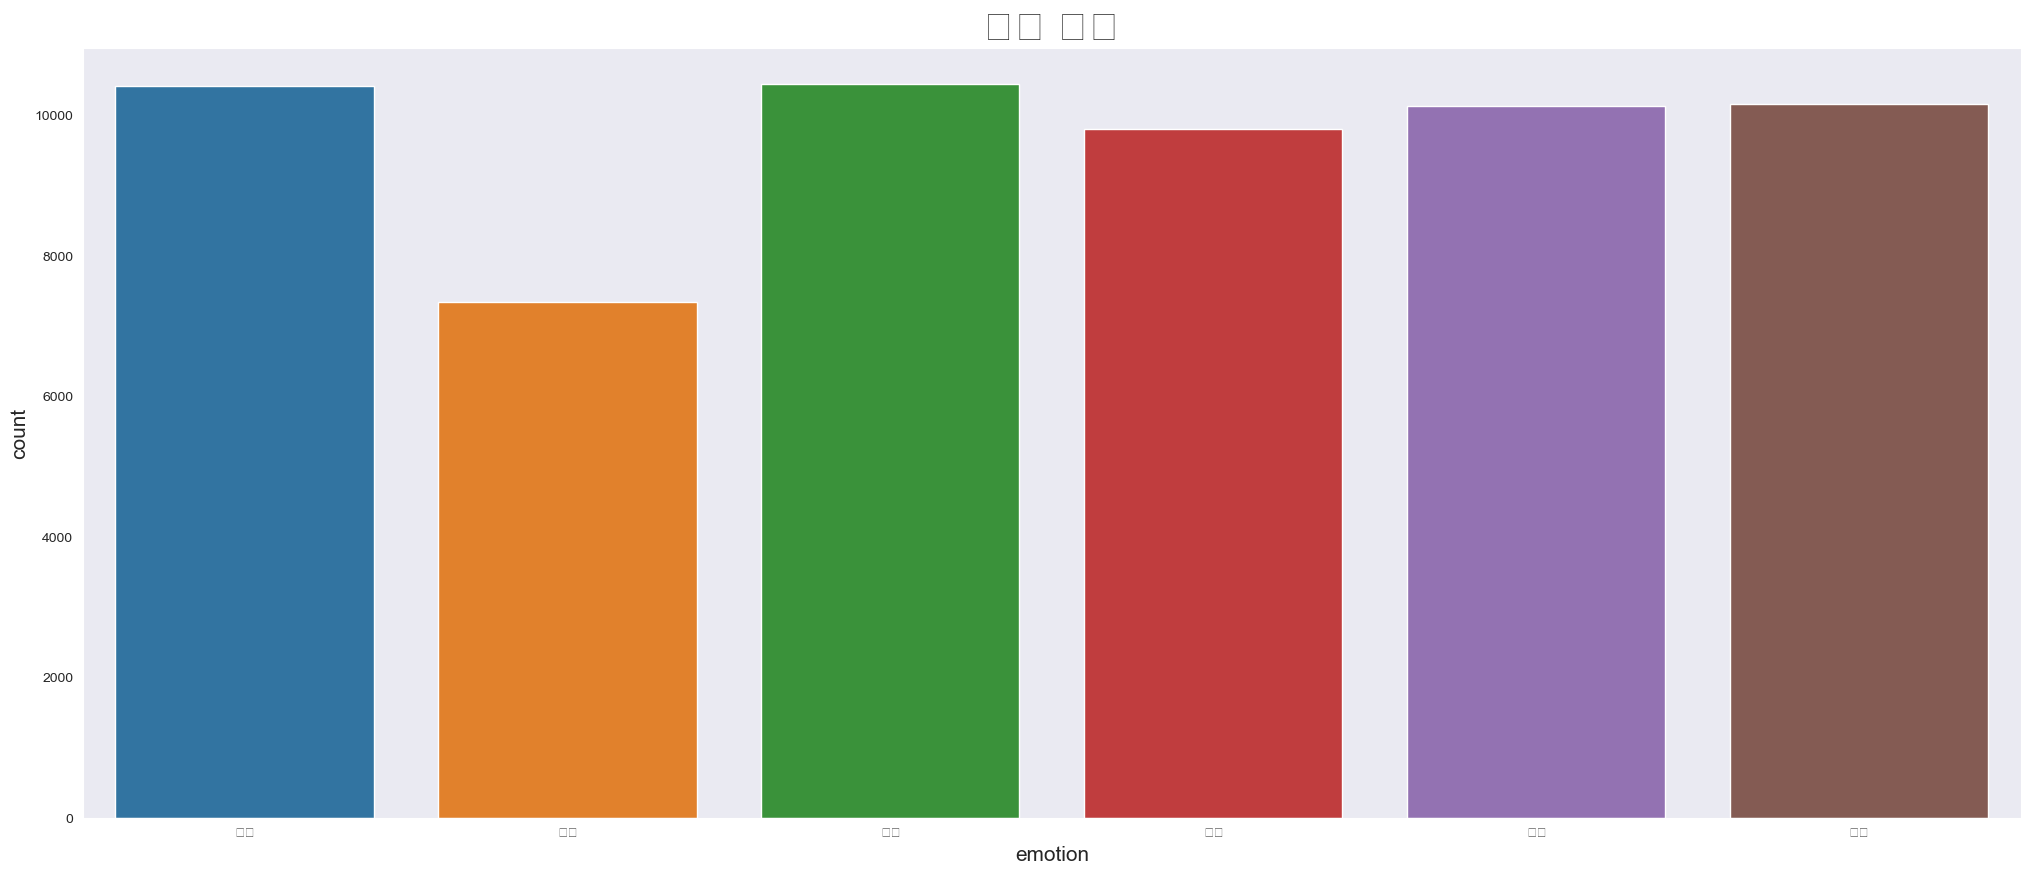

In [13]:
# countplot으로 시각화
import matplotlib.pyplot as plt
import seaborn as sns

#plt.rc('font', family='NanumSquare_ac')
plt.rcParams['figure.figsize'] = [25,10]
sns.set_style("dark")
sns.countplot(x='emotion',data=train1)
plt.title('감정 분포', fontsize=30)
plt.xlabel('emotion', fontsize=15)
plt.ylabel('count', fontsize=15)
plt.show()

# 정규화 필요한가?

In [14]:
import pandas as pd
file2_train = 'data/한국어_단발성_대화_데이터셋.csv'

train2 = pd.read_csv(file2_train)
train2.sample(n=5)

,Sentence,Emotion,Unnamed: 2,Unnamed: 3,Unnamed: 4,공포,5468
27311,오 드디어 ㅋㅋ 열일하는 나피디 ㅋㅋ,행복,NaN,NaN,NaN,NaN,NaN
26425,올해의 한국영화는 국내 반응으로 따지면 곡성이고 해외 반응으로 따지면 아가씨.,중립,NaN,NaN,NaN,NaN,NaN
35092,휴대용 폭탄하나 선물받고 600호 뺏기겠내..,혐오,NaN,NaN,NaN,NaN,NaN
15483,비인기종목 지원 부탁한게 정유라 지원하라고 지시한게되는구나. ㅈ티비씨 수준.,분노,NaN,NaN,NaN,NaN,NaN
8790,좀전에 일입니다.,놀람,NaN,NaN,NaN,NaN,NaN


In [15]:
#필요한 칼럼만 추출
train2 = train2[['Sentence','Emotion']]

#칼럼이름 변경
train2.columns = ['sentence', 'emotion']
train2.sample(n=5)

,sentence,emotion
34580,바보 기상청,혐오
12447,나라가 시끄러운 틈을 타 너도나도 이익 취하려는 집단 뿐이네,분노
21511,아 진짜 안전 불감증 큰일이구나..ㅠㅠ,슬픔
34087,대갈통에 구멍날까 무섭디? 이 쪼다들아!!!,혐오
37320,좌빨들 배제하는것 당연지사 아니가.,혐오


In [16]:
print(train2.info(), end = '\n\n')
print(train2.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38594 entries, 0 to 38593
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sentence  38594 non-null  object
 1   emotion   38594 non-null  object
dtypes: object(2)
memory usage: 603.2+ KB
None

sentence    0
emotion     0
dtype: int64


In [17]:
# 감정 분포 확인
train2.groupby('emotion').count().iloc[:,0]

emotion
공포    5468
놀람    5898
분노    5665
슬픔    5267
중립    4830
행복    6037
혐오    5429
Name: sentence, dtype: int64

In [18]:
train2.to_csv("data/단발성대화.csv")

In [20]:
import pandas as pd
file3_train = 'data\한국어_연속적_대화_데이터셋.csv'    #슬라시 방향 상관 없다?

train3 = pd.read_csv(file2_train)
train3.sample(n=5)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,행복,중립,슬픔,공포,혐오,분노,놀람
32237,S,저. 결심했잖아요. 앞으로 일 쉽게 하지 않겠다구요. 잘못 소개하면. 두 사람의 인...,중립,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53403,S,너희들은 크리스마스에 대해 뭔가 잘 모르고 있는 모양이군.,중립,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5642,NaN,아니예요! 단골집 다 확인했는데 어제 안 오셨대요. 친구 분들도 다 연락해봤는데 모...,중립,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54223,S,어이~ 같이 뛰자~,중립,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37577,NaN,"왜 그게 망신이야? 간소하고 허례허식 없이, 경건하게 결혼식을 한다는데, 그게 왜 ...",중립,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
#필요한 칼럼만 추출
train3 = train3[['Unnamed: 1','Unnamed: 2']]

#칼럼이름 변경
train3.columns = ['sentence', 'emotion']
train3.sample(n=5)

,sentence,emotion
27818,장모님 소리도 좀 빠른 거고.,중립
13880,뭐 보니까 약도 반도 안 들어갔구만..,중립
38260,"멀미하는 거 같은데, 껌 줄까요?",중립
8353,할 건 다 했어 벌써.,중립
37808,"하마가 따로 없다, 아주!",중립


In [22]:
print(train3.info(), end = '\n\n')
print(train3.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55629 entries, 0 to 55628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sentence  55628 non-null  object
 1   emotion   55622 non-null  object
dtypes: object(2)
memory usage: 869.3+ KB
None

sentence    1
emotion     7
dtype: int64


결측치 존재 -> 결측치 있는 행 출력

In [23]:
null_df = train3[train3.isnull().any(axis=1)]
null_df

,sentence,emotion
3707,저도 저희 반 학생이 도둑질을 했다고 믿고 싶진 않아요. 아마 서로 오해가 있었던 ...,NaN
30644,다 봤니? 다 못 봤으면 나머지 해줄까?,NaN
31816,그러니까. 돌 같은 걸 씹어서 이가 부러진 경우가 아니면.실상 보상을 받을 수 없다...,NaN
46290,NaN,NaN
47149,뭐가?,NaN
48754,창업은 실제 해보니까 어땠어요?,NaN
50535,안에는 들어가 봤나?,NaN


**결측치 있는 행 삭제**  
55629 -> 55622, 7개 모두 지워진거 확인

In [26]:
train3 = train3.dropna()
train3.shape

(55622, 2)

In [28]:
# 감정 분포 확인
train3.groupby('emotion').count().iloc[:,0]

emotion
ㄴ중립        1
ㅈ중립        1
ㅍ         12
감정         1
공포        98
놀람      4866
분          4
분ㄴ         1
분노      3628
슬픔      1972
줄          1
중림         1
중립     43786
행복      1030
혐오       220
Name: sentence, dtype: int64

오타가 다수 존재
<br>
우선 알아 볼 수 있는건 아래와 같이 치환하고 나머지를 확인
|ㄴ중립, ㅈ중립, 중림|중립|
|-----------|---|
|**분, 분ㄴ**|**분노**|

In [30]:
train3.loc[train3['emotion'].isin(('ㄴ중립','ㅈ중립','중림')), 'emotion'] = '중립'
train3.loc[train3['emotion'].isin(('분','분ㄴ')), 'emotion'] = '분노'

In [31]:
train3[train3['emotion'].isin(['ㅍ', '감정','줄'])]

,sentence,emotion
0,발화,감정
25037,인터넷에다 팔아야 되나.. 근데 너 이제 맘 잡았나보다?,ㅍ
27177,일부러 그럴 리가 있어요?,ㅍ
27948,그럼요?,ㅍ
28090,샤프심이 없어서..가지러 왔다가 누나 보이길래..,ㅍ
28455,아~ 자기소개서 쓰기 힘들어 죽겠어요~,ㅍ
28482,원래 남자들..다른 남자랑 친하게 지내면 그러니까..,ㅍ
36684,"그럼, 임마! 내가 누구냐? 한번 실수는 병가지상사다~이러시면서 나의 인간성과 품위...",ㅍ
37261,"처리 할거야. 처리해야지, 그게 돈이 얼만데?",ㅍ
37428,"와, 어디서 꽁돈이라도 생겼나?",ㅍ


0행은 원본 파일에서 열이름으로 쓰인거 같고 'ㅍ','줄'은 구분이 어려움  
--> 모두 삭제

In [32]:
train3 = train3.drop(train3[train3['emotion'].isin(['ㅍ', '감정','줄'])].index)
#train3 = train3[~train3['emotion'].isin(['가나', '다라'])]

다시 분포 확인

In [33]:
train3.groupby('emotion').count().iloc[:,0]

emotion
공포       98
놀람     4866
분노     3633
슬픔     1972
중립    43789
행복     1030
혐오      220
Name: sentence, dtype: int64

전처리 끝난 데이터 프레임 저장

In [34]:
train3.to_csv("data/연속적대화.csv")